In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.learning_curve import learning_curve

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


## 依據 X_train和 X_test 的比例 從X_train 裡切分train + valid data


In [2]:
X_train_train, X_valid, y_train_train, y_valid = train_test_split( 
    X_train, y_train, test_size=0.2, random_state=8)

In [3]:
# Standardization
sc_x = StandardScaler()
X_train_train_std = sc_x.fit_transform(X_train_train)
X_valid_std = sc_x.fit_transform(X_valid)
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.fit_transform(X_test)

# 定義分類錯誤率
def error(model, X, y):
    return sum(model.predict(X) != y) / len(y)

## 利用 grid search 從 random forest 中找尋分類錯誤率最低的模型 
## 並利用 learning curve 檢查最佳模型是否overfit

[ max depth: 1 ]
testing error mean: [0.40728613 0.38999021 0.39082518 0.39175549 0.39142153]


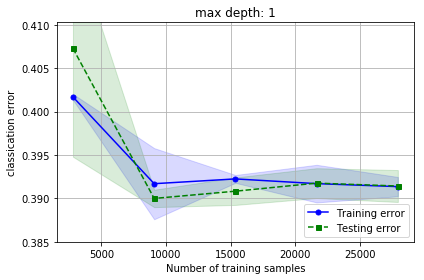

[ max depth: 2 ]
testing error mean: [0.38886906 0.38743765 0.38905982 0.38941763 0.38908367]


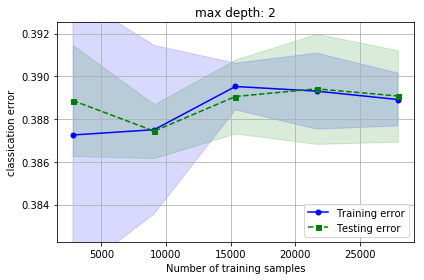

[ max depth: 3 ]
testing error mean: [0.38693662 0.38550531 0.38703207 0.38755692 0.38779549]


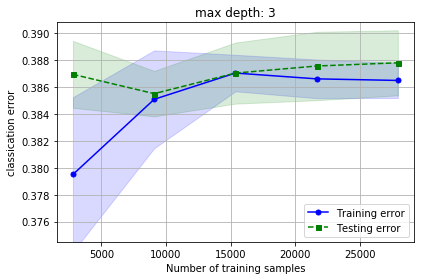

[ max depth: 4 ]
testing error mean: [0.38579147 0.38400243 0.3839785  0.38488505 0.38505208]


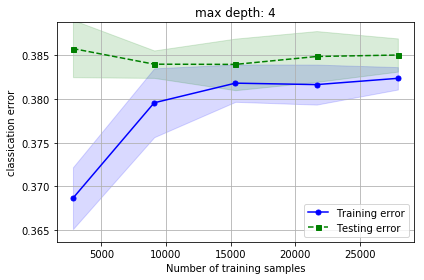

[ max depth: 5 ]
testing error mean: [0.38562453 0.38359692 0.3833822  0.38440796 0.38436027]


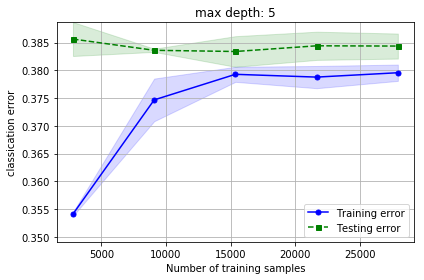

[ max depth: 6 ]
testing error mean: [0.38724663 0.3843842  0.38412168 0.38397853 0.38302434]


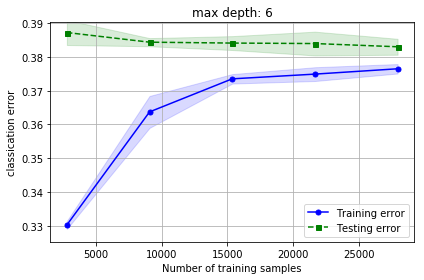

[ max depth: 7 ]
testing error mean: [0.38820082 0.38421713 0.38276194 0.38331059 0.38302432]


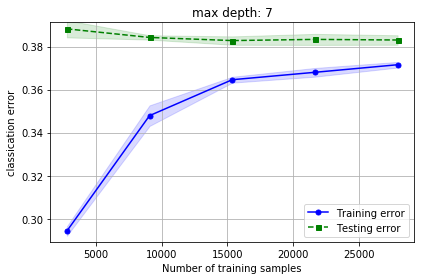

[ max depth: 8 ]
testing error mean: [0.38719896 0.38548151 0.38290503 0.38269036 0.38249952]


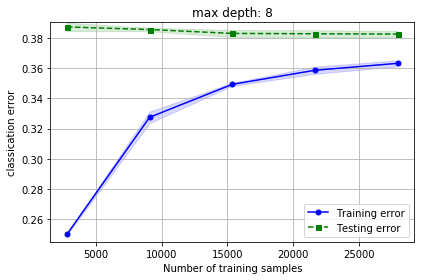

In [4]:
for i in [1,2,3,4,5,6,7,8]:
    model1 =  RandomForestClassifier(n_estimators=200, criterion='gini', random_state=8, n_jobs=3,
                                     max_depth = i)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator=model1, 
                                                            X=X_train_train_std, 
                                                            y=y_train_train.values.reshape(y_train_train.shape[0]), 
                                                            scoring=error)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    print("[ max depth:",i,"]")
    plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='Training error')
    plt.fill_between(train_sizes,
        train_mean+train_std,
        train_mean-train_std,
        alpha=0.15, color='blue')
    
    plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Testing error')
    plt.fill_between(train_sizes,
        test_mean+test_std,
        test_mean-test_std,
        alpha=0.15, color='green')    
    plt.title('max depth: %d' % i)
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('classication error')
    plt.legend(loc='lower right')
    plt.ylim([min(train_mean.min(),test_mean.min())-0.005, max(train_mean.max(),test_mean.max())+0.003])
    plt.tight_layout()
    print("testing error mean:",test_mean)
    plt.show()

由上面對不同 max depth(樹的複雜度)畫learning curve可以發現max depth:1-4似乎有underfitting的現象，故選取max depth:5-8之間且沒有overfitting的狀況的參數，並選取使得test error最小的max depth。

## 依據上面的learning curve 結果決定最佳的model 

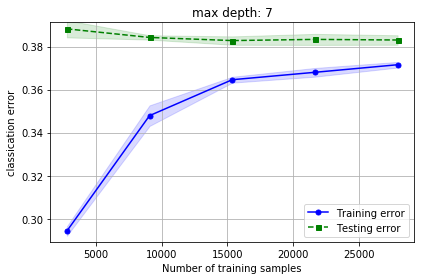

In [5]:
model1 = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=8, n_jobs=3,max_depth = 7)
model1.fit(X_train_train_std, y_train_train)

y_train_pred = model1.predict(X_train_train_std)
y_test_pred = model1.predict(X_valid_std)

train_sizes, train_scores, test_scores = learning_curve(estimator=model1, 
                                                            X=X_train_train_std, 
                                                            y=y_train_train.values.reshape(y_train_train.shape[0]), 
                                                            scoring=error)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')    
plt.title('max depth: %d' % 7)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('classication error')
plt.legend(loc='lower right')
plt.ylim([min(train_mean.min(),test_mean.min())-0.005, max(train_mean.max(),test_mean.max())+0.003])
plt.tight_layout()
plt.show()

## Feature_importances plot (依據 random forest 中的 gini 分數 )

Text(0,0.5,'gini')

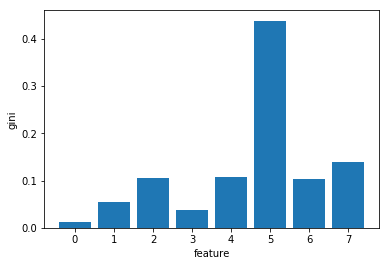

In [6]:
plt.bar(range(X_train.shape[1]), model1.feature_importances_)
plt.xlabel('feature');plt.ylabel('gini')

## 使用重要性前三名的 feature 來配適模型

In [7]:
# fit model by using top 3 feature
model2 = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=1, n_jobs=3,max_depth=7)
model2.fit(X_train_train_std[:,[4,5,7]], y_train_train)

# test error 
print('valid error:',
      sum(model2.predict(X_valid_std[:,[4,5,7]])==y_valid.values.reshape(X_valid_std.shape[0]))/(X_valid_std.shape[0]))

valid error: 0.6241412213740458


## 使用最佳模型配適最終的預測結果

In [8]:
# predict test data
model1.fit(X_train_std, y_train)
y_pred = model1.predict(X_test_std)

In [9]:
# submit
pd.DataFrame({"pred":y_pred}).to_csv('y_pred.csv',index=False)

Report

1.目前學過的模型能處理分類問題的有 Perceptron,Adaline 和 Random Forest，但是只知道Random Forest可以選擇特徵的重要性，故最後選擇Random Forest當做模型。

2.Random Forest 需要調整決策樹的個數以及每顆樹的深度，決策樹個數有測試幾個結果都差異不大，樹的深度差異比較明顯，故使用 grid search的方式來找尋最好的 valid error，並用 learning curve 檢查是否有 overfit 的情況。

3.確認沒有overfit後，用gini分數來找尋前三名的feature在配適模型，得到的valid error 為 0.624 勉強可以接受。

4.最後再利用全部的train data去配適模型得到最終的test data預測值。